In [1]:
#Importing Librarires
import numpy as np
import pandas as pd
import os
import math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
%matplotlib inline # for showing the figures in the Notebook itself

# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

UsageError: unrecognized arguments: # for showing the figures in the Notebook itself


In [2]:
dataset=pd.read_csv("FIFA_data.csv") 

In [3]:
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [4]:
dataset.tail(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18197,18197,246167,D. Holland,18,https://cdn.sofifa.org/players/4/19/246167.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,61,Cork City,https://cdn.sofifa.org/teams/2/light/422.png,€60K,€1K,1362,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CM,14.0,"Oct 5, 2018",NaN,2018,5'10,141lbs,45+2,45+2,45+2,49+2,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,47+2,47+2,47+2,49+2,45+2,44+2,44+2,44+2,45+2,44+2,40+2,40+2,40+2,44+2,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,52.0,51.0,68.0,62.0,58.0,41.0,62.0,50.0,55.0,50.0,38.0,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0,13.0,6.0,9.0,10.0,15.0,€88K
18198,18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,https://cdn.sofifa.org/teams/2/light/15015.png,€60K,€1K,792,Right,1.0,2.0,1.0,Medium/ Medium,Lean,No,GK,22.0,"Nov 10, 2018",NaN,2021,5'11,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,8.0,14.0,19.0,8.0,10.0,13.0,10.0,21.0,11.0,18.0,24.0,22.0,36.0,47.0,26.0,56.0,20.0,38.0,5.0,25.0,6.0,5.0,37.0,14.0,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18199,18199,244677,M. Baldisimo,18,https://cdn.sofifa.org/players/4/19/244677.png,Canada,https://cdn.sofifa.org/flags/70.png,47,69,Vancouver Whitecaps FC,https://cdn.sofifa.org/teams/2/light/101112.png,€70K,€1K,1303,Right,1.0,3.0,2.0,Medium/ High,Lean,No,CM,65.0,"Jul 17, 2018",NaN,2021,5'6,150lbs,42+2,42+2,42+2,43+2,44+2,44+2,44+2,43+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,45+2,47+2,48+2,48+2,48+2,47+2,47+2,48+2,48+2,48+2,47+2,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,55.0,47.0,60.0,63.0,53.0,46.0,55.0,49.0,57.0,42.0,43.0,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0,7.0,7.0,9.0,14.0,15.0,€175K
18200,18200,231381,J. Young,18,https://cdn.sofifa.org/players/4/19/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,62,Swindon Town,https://cdn.sofifa.org/teams/2/light/1934.png,€60K,€1K,1203,Left,1.0,2.0,2.0,Medium/ Medium,Lean,No,ST,21.0,"Oct 17, 2015",NaN,2019,5'9,157lbs,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,44+2,44+2,41+2,37+2,37+2,37+2,41+2,31+2,28+2,28+2,28+2,31+2,30+2,27+2,27+2,27+2,30+2,28.0,47.0,47.0,42.0,37.0,39.0,32.0,25.0,30.0,41.0,65.0,48.0,64.0,54.0,80.0,44.0,77.0,31.0,31.0,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0,11.0,15.0,12.0,12.0,11.0,€143K
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,https://cdn.sofifa.org/teams/2/light/753.png,€60K,€1K,1098,Left,1.0,3.0,2.0,Medium/ Medium,Lean,No,RB,29.0,"Apr 20, 2018",NaN,2018,6'1,168lbs,32+2,32+2,32+2,29+2,30+2,30+2,30+2,29+2,28+2,28+2,28+2,30+2,30+2,30+2,30+2,30+2,39+2,38+2,38+2,38+2,39+2,42+2,46+2,46+2,46+2,42+2,22.0,23.0,45.0,25.0,27.0,21.0,21.0,27.0,27.0,32.0,52.0,52.0,39.0,43.0,48.0,39.0,74.0,39.0,52.0,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [7]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [8]:
len(features_with_na)

76

In [9]:
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Club 0.0132  % missing values
Preferred Foot 0.0026  % missing values
International Reputation 0.0026  % missing values
Weak Foot 0.0026  % missing values
Skill Moves 0.0026  % missing values
Work Rate 0.0026  % missing values
Body Type 0.0026  % missing values
Real Face 0.0026  % missing values
Position 0.0033  % missing values
Jersey Number 0.0033  % missing values
Joined 0.0853  % missing values
Loaned From 0.9306  % missing values
Contract Valid Until 0.0159  % missing values
Height 0.0026  % missing values
Weight 0.0026  % missing values
LS 0.1145  % missing values
ST 0.1145  % missing values
RS 0.1145  % missing values
LW 0.1145  % missing values
LF 0.1145  % missing values
CF 0.1145  % missing values
RF 0.1145  % missing values
RW 0.1145  % missing values
LAM 0.1145  % missing values
CAM 0.1145  % missing values
RAM 0.1145  % missing values
LM 0.1145  % missing values
LCM 0.1145  % missing values
CM 0.1145  % missing values
RCM 0.1145  % missing values
RM 0.1145  % missing value

In [10]:
dataset.rename(columns = {'International Reputation':'International_Reputation', 'Weak Foot':'Weak_Foot','Contract Valid Until':'Contract_Valid_Until','Skill Moves':'Skill_Moves','Jersey Number':'Jersey_Number',"Preferred Foot":"Preferred_Foot","Work Rate":"Work_Rate","Body Type":"Body_Type","Real Face":"Real_Face",'Release Clause':"'Release_Clause'"}, inplace = True)

In [11]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred_Foot', 'International_Reputation', 'Weak_Foot',
       'Skill_Moves', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position',
       'Jersey_Number', 'Joined', 'Loaned From', 'Contract_Valid_Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [12]:
features_pos=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [13]:
data=dataset.copy()

In [14]:
for feature in features_pos:
    data[feature+"split"]=data[feature].str.split("+")
    

In [15]:
data.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Joined,Loaned From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplit,STsplit,RSsplit,LWsplit,LFsplit,CFsplit,RFsplit,RWsplit,LAMsplit,CAMsplit,RAMsplit,LMsplit,LCMsplit,CMsplit,RCMsplit,RMsplit,LWBsplit,LDMsplit,CDMsplit,RDMsplit,RWBsplit,LBsplit,LCBsplit,CBsplit,RCBsplit,RBsplit
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,"[88, 2]","[88, 2]","[88, 2]","[92, 2]","[93, 2]","[93, 2]","[93, 2]","[92, 2]","[93, 2]","[93, 2]","[93, 2]","[91, 2]","[84, 2]","[84, 2]","[84, 2]","[91, 2]","[64, 2]","[61, 2]","[61, 2]","[61, 2]","[64, 2]","[59, 2]","[47, 2]","[47, 2]","[47, 2]","[59, 2]"
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,"[91, 3]","[91, 3]","[91, 3]","[89, 3]","[90, 3]","[90, 3]","[90, 3]","[89, 3]","[88, 3]","[88, 3]","[88, 3]","[88, 3]","[81, 3]","[81, 3]","[81, 3]","[88, 3]","[65, 3]","[61, 3]","[61, 3]","[61, 3]","[65, 3]","[61, 3]","[53, 3]","[53, 3]","[53, 3]","[61, 3]"


In [16]:
feature_pos=['LSsplit', 'STsplit', 'RSsplit', 'LWsplit', 'LFsplit', 'CFsplit', 'RFsplit', 'RWsplit', 'LAMsplit', 'CAMsplit', 'RAMsplit', 'LMsplit', 'LCMsplit', 'CMsplit', 'RCMsplit', 'RMsplit', 'LWBsplit', 'LDMsplit', 'CDMsplit', 'RDMsplit', 'RWBsplit', 'LBsplit', 'LCBsplit', 'CBsplit', 'RCBsplit', 'RBsplit']

In [17]:
for feature in feature_pos:
    df=data[feature].apply(pd.Series)
    df[0]=df[0].astype(float)
    df[1]=df[1].astype(float)
    data[feature+"pos"]=df[0]+df[1]

In [18]:
print(data.columns.tolist())

['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred_Foot', 'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Joined', 'Loaned From', 'Contract_Valid_Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', "'Release_Clause'",

In [19]:
data=data.drop([ 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','LSsplit', 'STsplit', 'RSsplit', 'LWsplit', 'LFsplit', 'CFsplit', 'RFsplit', 'RWsplit', 'LAMsplit', 'CAMsplit', 'RAMsplit', 'LMsplit', 'LCMsplit', 'CMsplit', 'RCMsplit', 'RMsplit', 'LWBsplit', 'LDMsplit', 'CDMsplit', 'RDMsplit', 'RWBsplit', 'LBsplit', 'LCBsplit', 'CBsplit', 'RCBsplit', 'RBsplit'],axis=1)

In [20]:
data=data.drop(['Unnamed: 0'],axis=1)

In [21]:
data.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Joined,Loaned From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0


In [22]:
data['Value']=data.Value.str.strip('€')
data['valueS']=data.Value.str[-1:]
data['Value'] =data['Value'].map(lambda x: str(x)[:-1])

In [23]:
data['valueS']=data['valueS'].str.replace("M",'1000000').replace("K",'1000')

In [24]:
data['Value']=pd.to_numeric(data['Value'],errors='coerce')
data['valueS']=pd.to_numeric(data['valueS'],errors='coerce')

In [25]:
data['MarketValue']=data['Value']*data['valueS']
data['MarketValue'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: MarketValue, dtype: float64

In [26]:
data['Wage']=data.Wage.str.strip('€')
data['wageS']=data.Wage.str[-1:]
data['Wage'] =data['Wage'].map(lambda x: str(x)[:-1])

In [27]:
data['wageS']=data['wageS'].str.replace("K",'1000')

In [28]:
data['Wage']=pd.to_numeric(data['Wage'],errors='coerce')
data['wageS']=pd.to_numeric(data['wageS'],errors='coerce')

In [29]:
data['MonthlyWage']=data['Wage']*data['wageS']
data['MonthlyWage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: MonthlyWage, dtype: float64

In [30]:
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Joined,Loaned From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,valueS,MarketValue,wageS,MonthlyWage
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,1000000,110500000.0,1000,565000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,1000000,77000000.0,1000,405000.0


In [31]:
data=data.drop(["Value","Wage","valueS","wageS"],axis=1)

In [32]:
data.Joined.head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [33]:
data['Joined_mon'] = pd.DatetimeIndex(data['Joined']).month
data['Joined_day'] = pd.DatetimeIndex(data['Joined']).day
data['Joined_year'] = pd.DatetimeIndex(data['Joined']).year

In [34]:
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Joined,Loaned From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7.0,1.0,2004.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7.0,10.0,2018.0


In [35]:
data['Joined_mon']=data['Joined_mon'].fillna(0)
data['Joined_day']=data['Joined_day'].fillna(0)
data['Joined_year']=data['Joined_year'].fillna(0)

In [36]:
data['Joined_day']=data['Joined_day'].astype('int64')
data['Joined_year']=data['Joined_year'].astype('int64')
data['Joined_mon']=data['Joined_mon'].astype('int64')

In [37]:
data=data.drop(['Joined'],axis=1)

In [38]:
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Loaned From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7,10,2018


In [39]:
data['Height_cm']=data.Height.str.split("'")

In [40]:
data['Height_cm'].head(2)

0    [5, 7]
1    [6, 2]
Name: Height_cm, dtype: object

In [41]:
temp_df=data['Height_cm'].apply(pd.Series)



In [42]:
temp_df[0]=temp_df[0].fillna(0)
temp_df[1]=temp_df[1].fillna(0)

In [43]:
temp_df[0]=temp_df[0].astype(int)
temp_df[1]=temp_df[1].astype(int)

In [44]:
data['HeightCM']=((temp_df[0]*12)+temp_df[1])*2.54

In [45]:
data['HeightCM'].head(5)

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: HeightCM, dtype: float64

In [46]:
data['WeightKg']=data.Weight.str.replace("lbs","")

In [47]:
data['WeightKg']=data['WeightKg'].fillna(0)

In [48]:
data['WeightKg']=data['WeightKg'].astype(float)

In [49]:
data['WeightKg']=data['WeightKg']*0.45359237

In [50]:
data.WeightKg.head(2)

0    72.121187
1    83.007404
Name: WeightKg, dtype: float64

In [51]:
data=data.drop(['Weight','Height'],axis=1)

In [52]:
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Loaned From,Contract_Valid_Until,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,Height_cm,HeightCM,WeightKg
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,NaN,2021,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004,"[5, 7]",170.18,72.121187
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,NaN,2022,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7,10,2018,"[6, 2]",187.96,83.007404


In [53]:
data=data.drop(['Height_cm'],axis=1)

In [54]:
data=data.drop(['Loaned From'],axis=1)

In [55]:
data['Contract_Valid_Until_year']=pd.DatetimeIndex(data['Contract_Valid_Until']).year

In [56]:
data['Contract_Valid_Until_year']=data['Contract_Valid_Until_year'].fillna(0)

In [57]:
data['Contract_Valid_Until_year']=data['Contract_Valid_Until_year'].astype("int64")

In [58]:
data['total_year_club']=data['Contract_Valid_Until_year']-data['Joined_year']

In [59]:
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Contract_Valid_Until,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7,10,2018,187.96,83.007404,2022,4


In [60]:
data=data.drop(['Contract_Valid_Until'],axis=1)

In [61]:
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,'Release_Clause',LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7,10,2018,187.96,83.007404,2022,4


In [62]:
data["'Release_Clause'"].head(2)

0    €226.5M
1    €127.1M
Name: 'Release_Clause', dtype: object

In [63]:
data.rename(columns ={"'Release_Clause'":"Release_Clause"},inplace=True)

In [64]:
data["Release_Clause"]=data.Release_Clause.str.strip('€')
data['Release_Clause_new']=data.Release_Clause.str[-1:]
data["Release_Clause"] =data["Release_Clause"].map(lambda x: str(x)[:-1])

In [65]:
data['Release_Clause_new']=data['Release_Clause_new'].str.replace("M",'1000000')

In [66]:
data['Release_Clause']=pd.to_numeric(data['Release_Clause'],errors='coerce')
data['Release_Clause_new']=pd.to_numeric(data['Release_Clause_new'],errors='coerce')

In [67]:
data['ReleaseClause']=data['Release_Clause']*data['Release_Clause_new']
data['ReleaseClause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: ReleaseClause, dtype: float64

In [68]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Special', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release_Clause',
       'LSsplitpos', 'STsplitpos', 'RSsplitpos', 'LWsplitpos', 'LFsplitpos',
       'CFsplitpos', 'RFsplitpos', 'RWsplitpos', 'LAMsplitpos', 'CAMsplitpos',
       'RAMsplitpos', 'LMsplitpos', '

In [69]:
data=data.drop(['Release_Clause',"Release_Clause_new"],axis=1)

In [70]:
data.head(1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17,226500000.0


In [71]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  79


,ID,Age,Overall,Potential,Special,International_Reputation,Weak_Foot,Skill_Moves,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17,226500000.0
1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7,10,2018,187.96,83.007404,2022,4,127100000.0
2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,118500000.0,290000.0,8,3,2017,175.26,68.038855,2022,5,228100000.0
3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72000000.0,260000.0,7,1,2011,193.04,76.203518,2020,9,138600000.0
4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,102000000.0,355000.0,8,30,2015,180.34,69.853225,2023,8,196400000.0


In [72]:
discrete_feature = [feature for feature in data.columns if data[feature].dtypes == 'int64']
print("discrete feature Count {}".format(len(discrete_feature)))

discrete feature Count 10


In [73]:
discrete_feature

['ID',
 'Age',
 'Overall',
 'Potential',
 'Special',
 'Joined_mon',
 'Joined_day',
 'Joined_year',
 'Contract_Valid_Until_year',
 'total_year_club']

In [74]:
continuous_feature=[feature for feature in data.columns if data[feature].dtypes == 'float64']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 69


In [75]:
continuous_feature

['International_Reputation',
 'Weak_Foot',
 'Skill_Moves',
 'Jersey_Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'LSsplitpos',
 'STsplitpos',
 'RSsplitpos',
 'LWsplitpos',
 'LFsplitpos',
 'CFsplitpos',
 'RFsplitpos',
 'RWsplitpos',
 'LAMsplitpos',
 'CAMsplitpos',
 'RAMsplitpos',
 'LMsplitpos',
 'LCMsplitpos',
 'CMsplitpos',
 'RCMsplitpos',
 'RMsplitpos',
 'LWBsplitpos',
 'LDMsplitpos',
 'CDMsplitpos',
 'RDMsplitpos',
 'RWBsplitpos',
 'LBsplitpos',
 'LCBsplitpos',
 'CBsplitpos',
 'RCBsplitpos',
 'RBsplitpos',
 'MarketValue',
 'MonthlyW

In [76]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
print("categorical feature Count {}".format(len(categorical_features)))

categorical feature Count 11


In [77]:
categorical_features

['Name',
 'Photo',
 'Nationality',
 'Flag',
 'Club',
 'Club Logo',
 'Preferred_Foot',
 'Work_Rate',
 'Body_Type',
 'Real_Face',
 'Position']

In [78]:
null_cat=[]
for feature in categorical_features:
    catNull = data[feature].isnull().sum()
    null_cat.append(f'{feature} has {catNull} null values')

In [79]:
null_cat

['Name has 0 null values',
 'Photo has 0 null values',
 'Nationality has 0 null values',
 'Flag has 0 null values',
 'Club has 241 null values',
 'Club Logo has 0 null values',
 'Preferred_Foot has 48 null values',
 'Work_Rate has 48 null values',
 'Body_Type has 48 null values',
 'Real_Face has 48 null values',
 'Position has 60 null values']

In [80]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Name and number of categories are 17194
The feature is Photo and number of categories are 18207
The feature is Nationality and number of categories are 164
The feature is Flag and number of categories are 164
The feature is Club and number of categories are 652
The feature is Club Logo and number of categories are 679
The feature is Preferred_Foot and number of categories are 3
The feature is Work_Rate and number of categories are 10
The feature is Body_Type and number of categories are 11
The feature is Real_Face and number of categories are 3
The feature is Position and number of categories are 28


In [81]:
features_nan=['Club','Preferred_Foot','Work_Rate','Body_Type',"Real_Face","Position"]

In [82]:
## Replace missing value with a new label
def replace_cat_feature(data,features_nan):
    df=data.copy()
    df[features_nan]=df[features_nan].fillna('Missing')
    return df

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

Club              0
Preferred_Foot    0
Work_Rate         0
Body_Type         0
Real_Face         0
Position          0
dtype: int64

In [83]:
null_dis=[]
for feature in discrete_feature:
    disNull = data[feature].isnull().sum()
    null_dis.append(f'{feature} has {disNull} null values')

In [84]:
null_dis

['ID has 0 null values',
 'Age has 0 null values',
 'Overall has 0 null values',
 'Potential has 0 null values',
 'Special has 0 null values',
 'Joined_mon has 0 null values',
 'Joined_day has 0 null values',
 'Joined_year has 0 null values',
 'Contract_Valid_Until_year has 0 null values',
 'total_year_club has 0 null values']

In [85]:
feature_dis_nan=["Joined_mon","Joined_day","Joined_year","Contract_Valid_Until_year"]

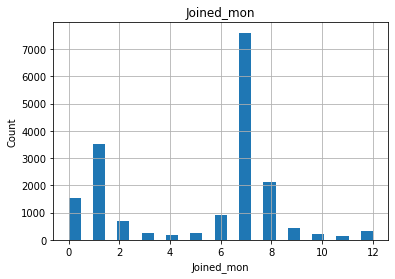

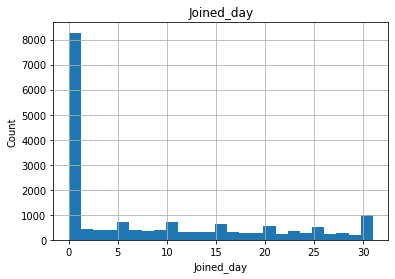

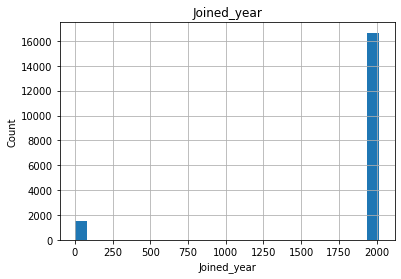

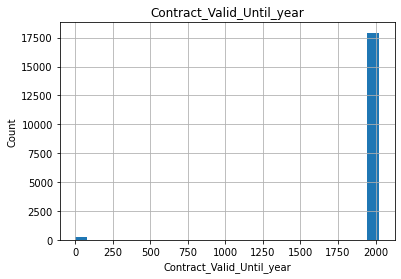

In [86]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in feature_dis_nan:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [87]:
#333data['Joined_mon']=data['Joined_mon'].mask(data['Joined_mon']==0).fillna(data['Joined_mon'].median())

In [88]:
null_con=[]
for feature in continuous_feature:
    conNull = data[feature].isnull().sum()
    null_con.append(f'{feature} has {conNull} null values')

In [89]:
null_con

['International_Reputation has 48 null values',
 'Weak_Foot has 48 null values',
 'Skill_Moves has 48 null values',
 'Jersey_Number has 60 null values',
 'Crossing has 48 null values',
 'Finishing has 48 null values',
 'HeadingAccuracy has 48 null values',
 'ShortPassing has 48 null values',
 'Volleys has 48 null values',
 'Dribbling has 48 null values',
 'Curve has 48 null values',
 'FKAccuracy has 48 null values',
 'LongPassing has 48 null values',
 'BallControl has 48 null values',
 'Acceleration has 48 null values',
 'SprintSpeed has 48 null values',
 'Agility has 48 null values',
 'Reactions has 48 null values',
 'Balance has 48 null values',
 'ShotPower has 48 null values',
 'Jumping has 48 null values',
 'Stamina has 48 null values',
 'Strength has 48 null values',
 'LongShots has 48 null values',
 'Aggression has 48 null values',
 'Interceptions has 48 null values',
 'Positioning has 48 null values',
 'Vision has 48 null values',
 'Penalties has 48 null values',
 'Composure has

In [90]:
median_impute= ['International_Reputation','Weak_Foot',
       'Skill_Moves','MarketValue', 'MonthlyWage',"ReleaseClause"]
mean_impute=['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','LSsplitpos', 'STsplitpos', 'RSsplitpos', 'LWsplitpos', 'LFsplitpos',
       'CFsplitpos', 'RFsplitpos', 'RWsplitpos', 'LAMsplitpos', 'CAMsplitpos',
       'RAMsplitpos', 'LMsplitpos', 'LCMsplitpos', 'CMsplitpos', 'RCMsplitpos',
       'RMsplitpos', 'LWBsplitpos', 'LDMsplitpos', 'CDMsplitpos',
       'RDMsplitpos', 'RWBsplitpos', 'LBsplitpos', 'LCBsplitpos', 'CBsplitpos',
       'RCBsplitpos', 'RBsplitpos']

median_Gk=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [91]:
## Replacing the Continuous feature with Missing Values as median in GK

for feature in median_Gk:
    ## We will replace by using median since there are outliers
    median_GK_value=data[feature].median()
    
    ## create a new feature to capture nan values
#     dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    data[feature].fillna(median_GK_value,inplace=True)

In [92]:
data[median_Gk].isnull().sum()

GKDiving         0
GKHandling       0
GKKicking        0
GKPositioning    0
GKReflexes       0
dtype: int64

In [93]:
## Replacing the Continuous feature with Missing Values as median

for feature in median_impute:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
#     dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)

In [94]:
data[median_impute].isnull().sum()

International_Reputation    0
Weak_Foot                   0
Skill_Moves                 0
MarketValue                 0
MonthlyWage                 0
ReleaseClause               0
dtype: int64

In [95]:
## Replacing the numerical Missing Values

for feature in mean_impute:
    ## We will replace by using median since there are outliers
    mean_value=data[feature].mean()
    
    ## create a new feature to capture nan values
#     dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    data[feature].fillna(mean_value,inplace=True)

In [96]:
data[mean_impute].isnull().sum()

Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
LSsplitpos         0
STsplitpos         0
RSsplitpos         0
LWsplitpos         0
LFsplitpos         0
CFsplitpos         0
RFsplitpos         0
RWsplitpos         0
LAMsplitpos        0
CAMsplitpos        0
RAMsplitpos        0
LMsplitpos         0
LCMsplitpos        0
CMsplitpos         0
RCMsplitpos        0
RMsplitpos         0
LWBsplitpos        0
LDMsplitpos        0
CDMsplitpos  

In [97]:
data.WeightKg.unique()

array([ 72.12118683,  83.00740371,  68.0388555 ,  76.20351816,
        69.85322498,  73.93555631,  66.22448602,  86.1825503 ,
        82.10021897,  87.08973504,  79.83225712,  78.01788764,
        67.13167076,  74.84274105,  88.90410452,  73.02837157,
        84.82177319,  96.16158244,  77.1107029 ,  92.07925111,
        71.21400209,  83.91458845,  58.9670081 ,  78.92507238,
        93.89362059,  60.78137758,  63.95652417,  68.94604024,
        81.19303423,  59.87419284,  91.17206637,  89.81128926,
        94.80080533,  97.06876718,  64.86370891,  92.98643585,
        62.14215469,  87.99691978,  97.97595192,  63.04933943,
        99.7903214 ,  57.15263862,  98.88313666,  55.79186151,
       102.96546799,  58.05982336, 101.15109851, 102.05828325,
        54.88467677,  52.16312255,  53.07030729, 107.04779932,
       103.87265273, 110.22294591,   0.        ,  49.8951607 ,
        53.97749203, 106.14061458])

In [98]:
data.HeightCM.unique()

array([170.18, 187.96, 175.26, 193.04, 180.34, 172.72, 182.88, 167.64,
       177.8 , 198.12, 185.42, 162.56, 190.5 , 165.1 , 195.58, 200.66,
       160.02, 157.48, 203.2 , 154.94, 205.74,   0.  ])

In [99]:
hw =["HeightCM","WeightKg"]

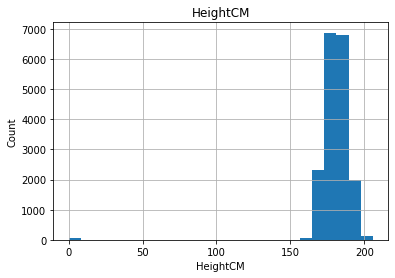

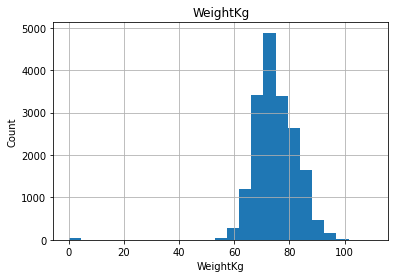

In [100]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in hw:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [101]:
data['HeightCM']=data['HeightCM'].mask(data['HeightCM']==0).fillna(data['HeightCM'].median())

In [102]:
data['WeightKg']=data['WeightKg'].mask(data['WeightKg']==0).fillna(data['WeightKg'].median())

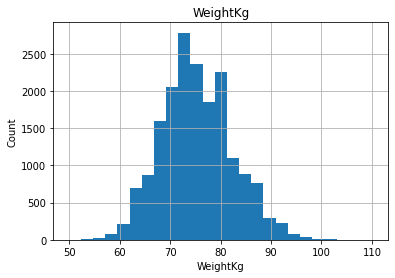

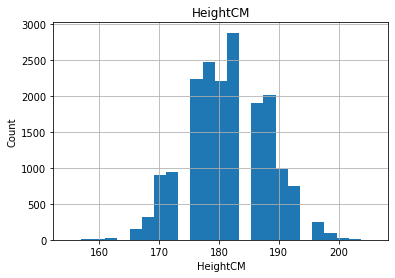

In [103]:
hw1=["WeightKg","HeightCM"]
for feature in hw1:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Data Vizualization

In [104]:
df=data.copy()

In [105]:
df['Work_Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', 'Missing'], dtype=object)

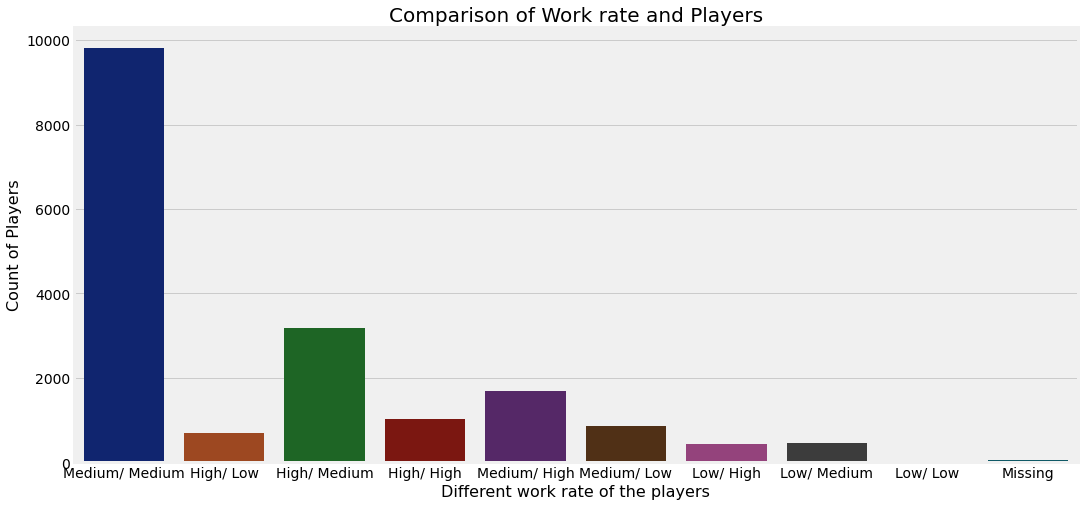

In [106]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Work_Rate', data = df, palette = 'dark')
ax.set_xlabel(xlabel = 'Different work rate of the players', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Work rate and Players', fontsize = 20)
plt.show()

In [107]:
df.Preferred_Foot.unique()

array(['Left', 'Right', 'Missing'], dtype=object)

In [108]:
# finding out the top 10 left footed footballers
df_new = df[df['Preferred_Foot'] == 'Left']

In [109]:
df_new.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,90.000,90.000,90.000,94.000000,95.000000,95.000000,95.000000,94.000000,95.00000,95.00000,95.00000,93.000000,86.000000,86.000000,86.000000,93.000000,66.000000,63.000000,63.000000,63.000000,66.000000,61.000000,49.000000,49.000000,49.000000,61.000000,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17,226500000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2115,Left,4.0,2.0,4.0,High/ Medium,Normal,Yes,LCM,21.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,80.000,80.000,80.000,88.000000,87.000000,87.000000,87.000000,88.000000,90.00000,90.00000,90.00000,88.000000,88.000000,88.000000,88.000000,88.000000,72.000000,73.000000,73.000000,73.000000,72.000000,67.000000,60.000000,60.000000,60.000000,67.000000,60000000.0,285000.0,7,14,2010,172.72,67.131671,2020,10,111000000.0
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2092,Left,3.0,3.0,4.0,High/ Medium,Normal,Yes,LF,21.0,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,86.000,86.000,86.000,90.000000,89.000000,89.000000,89.000000,90.000000,90.00000,90.00000,90.00000,89.000000,82.000000,82.000000,82.000000,89.000000,65.000000,61.000000,61.000000,61.000000,65.000000,59.000000,48.000000,48.000000,48.000000,59.000000,89000000.0,205000.0,7,1,2015,177.80,74.842741,2022,7,153500000.0
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,2246,Left,4.0,3.0,4.0,High/ High,Lean,Yes,CAM,7.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,89.000,89.000,89.000,90.000000,90.000000,90.000000,90.000000,90.000000,89.00000,89.00000,89.00000,89.000000,83.000000,83.000000,83.000000,89.000000,73.000000,70.000000,70.000000,70.000000,73.000000,70.000000,64.000000,64.000000,64.000000,70.000000,78000000.0,145000.0,7,28,2014,175.26,73.028372,2023,9,165800000.0
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2

In [110]:
df_new.shape

(4211, 90)

In [111]:
df_new.sort_values('Overall',ascending=False,inplace=True)

In [112]:
left=df_new.head(10)

In [113]:
# finding out the top 10 left footed footballers
df_new1 = df[df['Preferred_Foot'] == 'Right']

In [114]:
df_new1.shape

(13948, 90)

In [115]:
df_new1.sort_values('Overall',ascending=False,inplace=True)

In [116]:
right=df_new1.head(10)

In [117]:
#Player with maximum Potential and Overall Performance

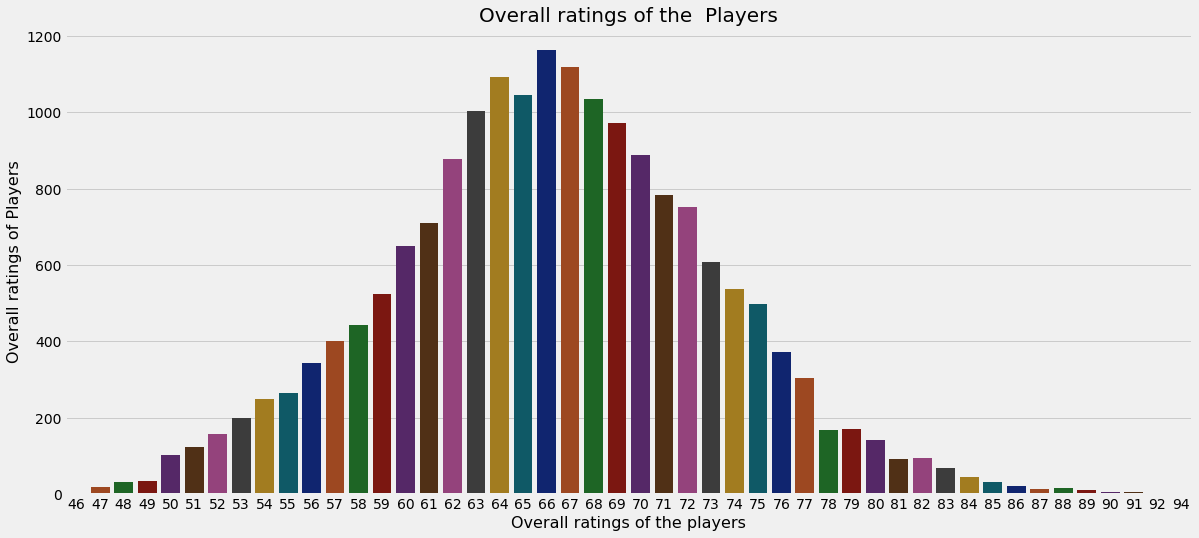

In [118]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Overall', data = df, palette = 'dark')
ax.set_xlabel(xlabel = 'Overall ratings of the players', fontsize = 16)
ax.set_ylabel(ylabel = 'Overall ratings of Players', fontsize = 16)
ax.set_title(label = 'Overall ratings of the  Players', fontsize = 20)
plt.show()

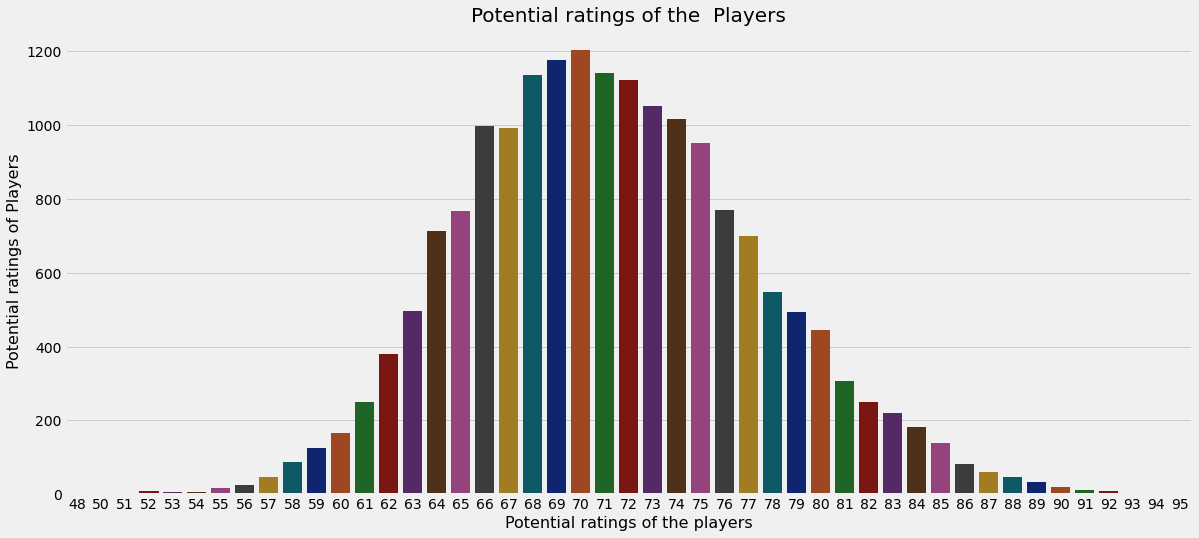

In [119]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Potential', data = df, palette = 'dark')
ax.set_xlabel(xlabel = 'Potential ratings of the players', fontsize = 16)
ax.set_ylabel(ylabel = 'Potential ratings of Players', fontsize = 16)
ax.set_title(label = 'Potential ratings of the  Players', fontsize = 20)
plt.show()

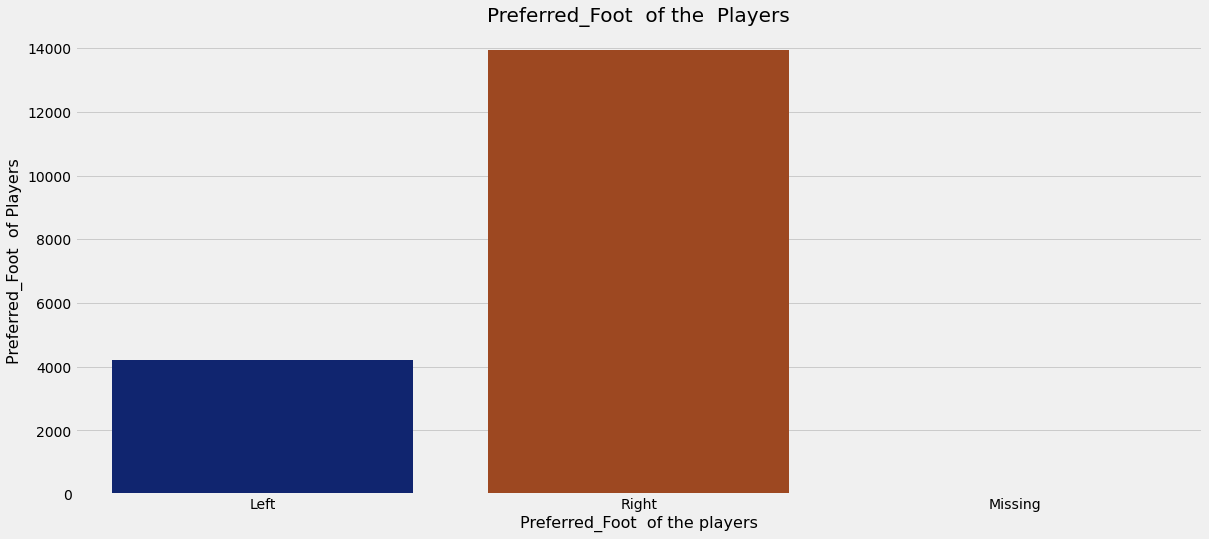

In [120]:
# Plot to show the preferred foot choice of different players
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Preferred_Foot', data = df, palette = 'dark')
ax.set_xlabel(xlabel = 'Preferred_Foot  of the players', fontsize = 16)
ax.set_ylabel(ylabel = 'Preferred_Foot  of Players', fontsize = 16)
ax.set_title(label = 'Preferred_Foot  of the  Players', fontsize = 20)
plt.show()

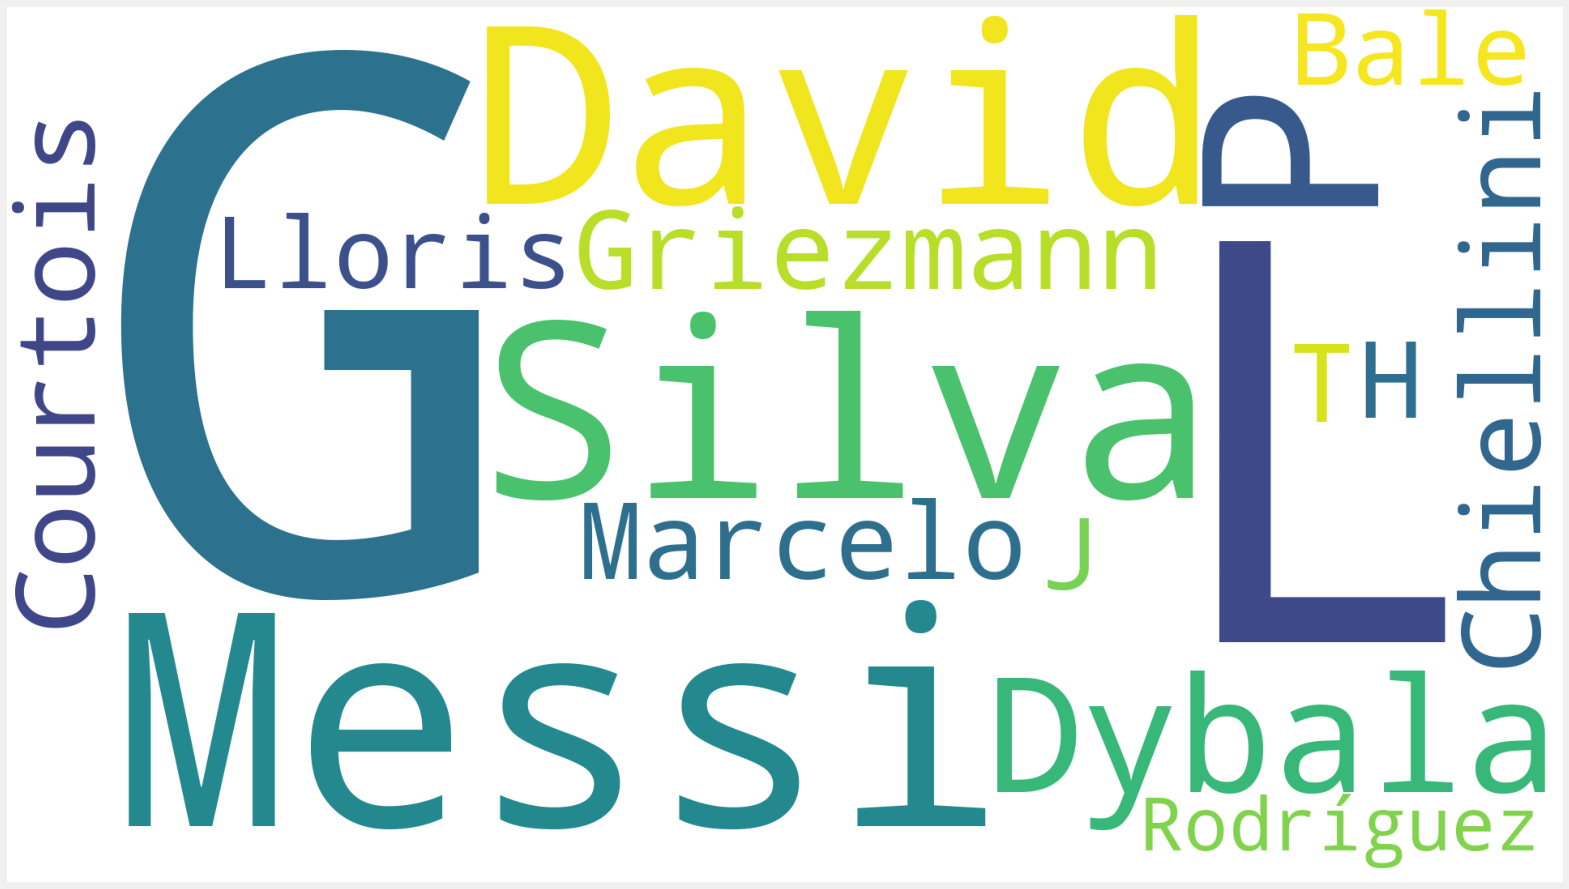

In [121]:
#showing the name of the players which occurs the most number of times(right join)
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(left.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

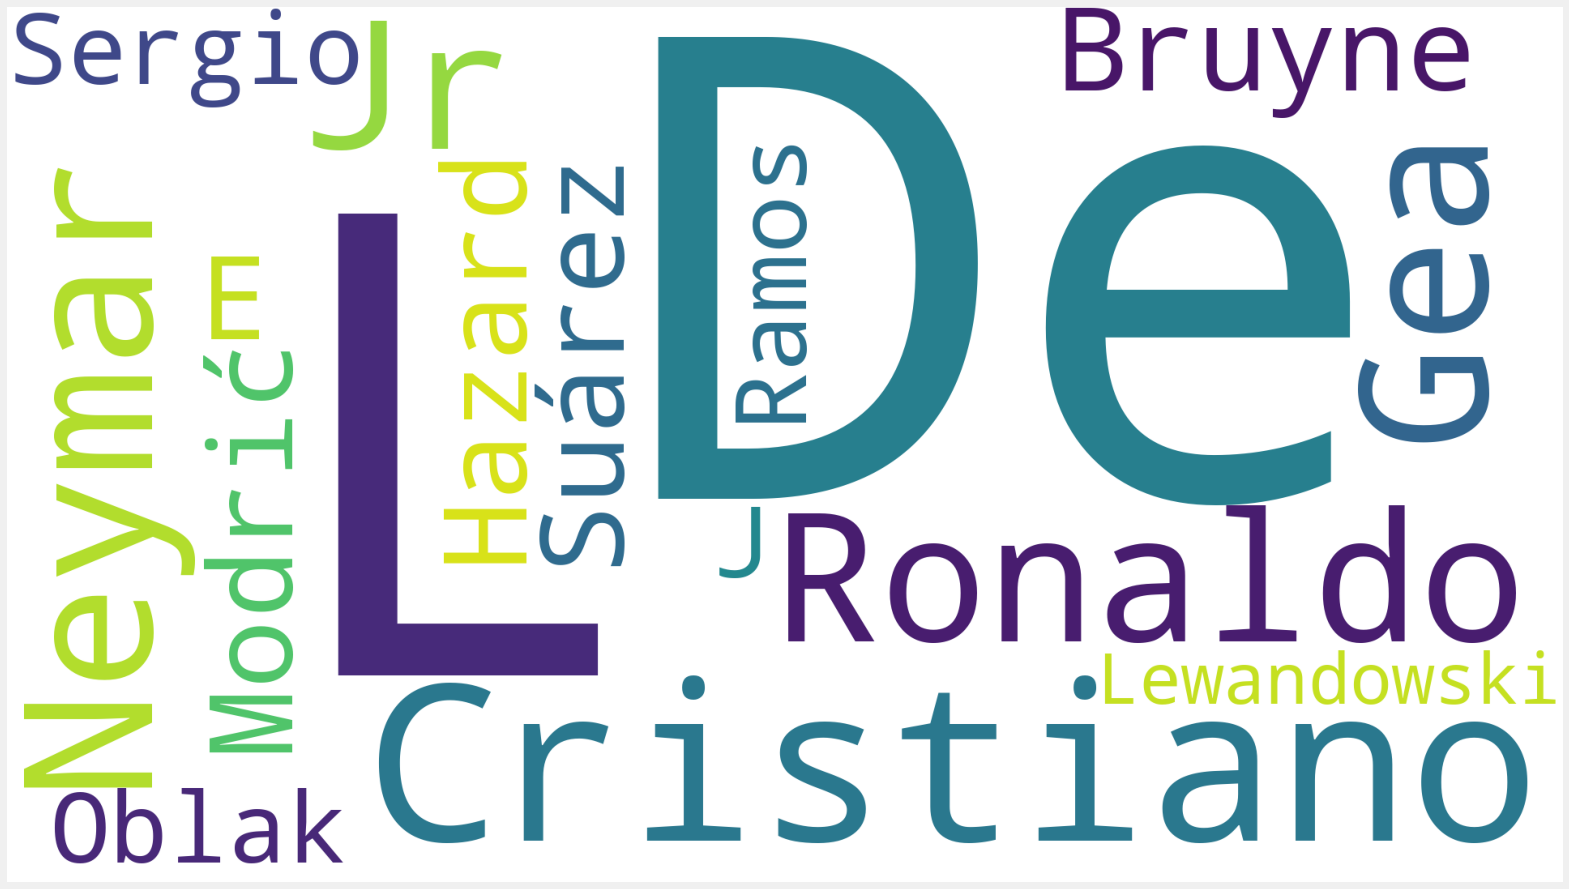

In [122]:
#showing the name of the players which occurs the most number of times(right join)

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(right.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

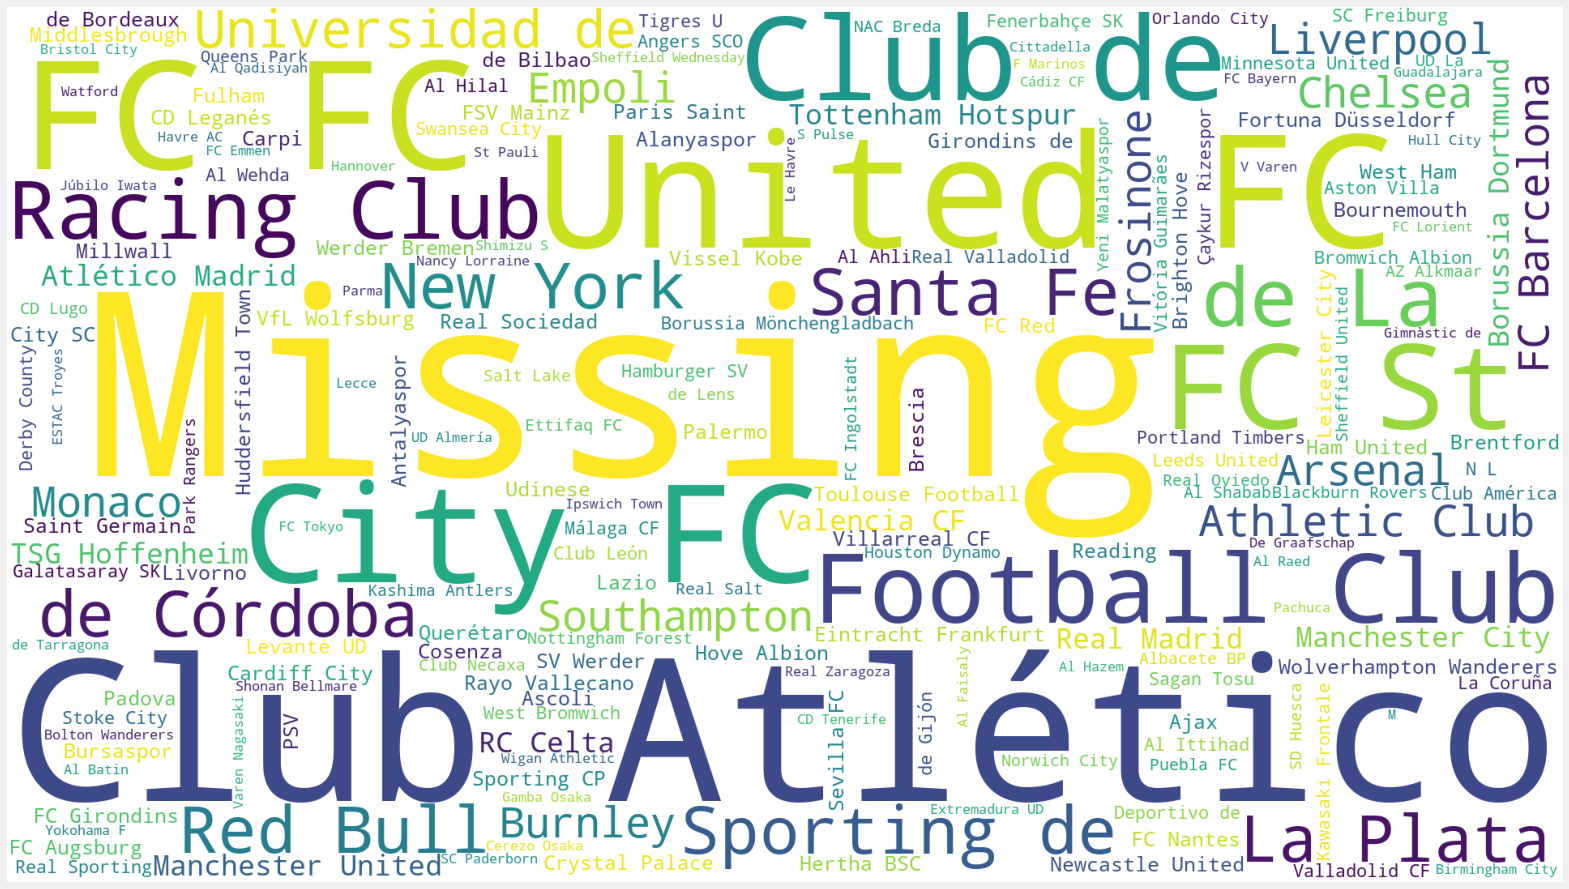

In [123]:
#checking which clubs have been mentioned the most

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [124]:
df.Club.unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [125]:
# temp = df.Club.value_counts().rename_axis('unique_values').reset_index(name='counts')
# temp2=temp.head(10)
# temp2
# import plotly.graph_objects as go
# # animals=['giraffes', 'orangutans', 'monkeys']
# fig = go.Figure([go.Bar(x=temp['unique_values'], y=temp['counts'])])
# fig.show()

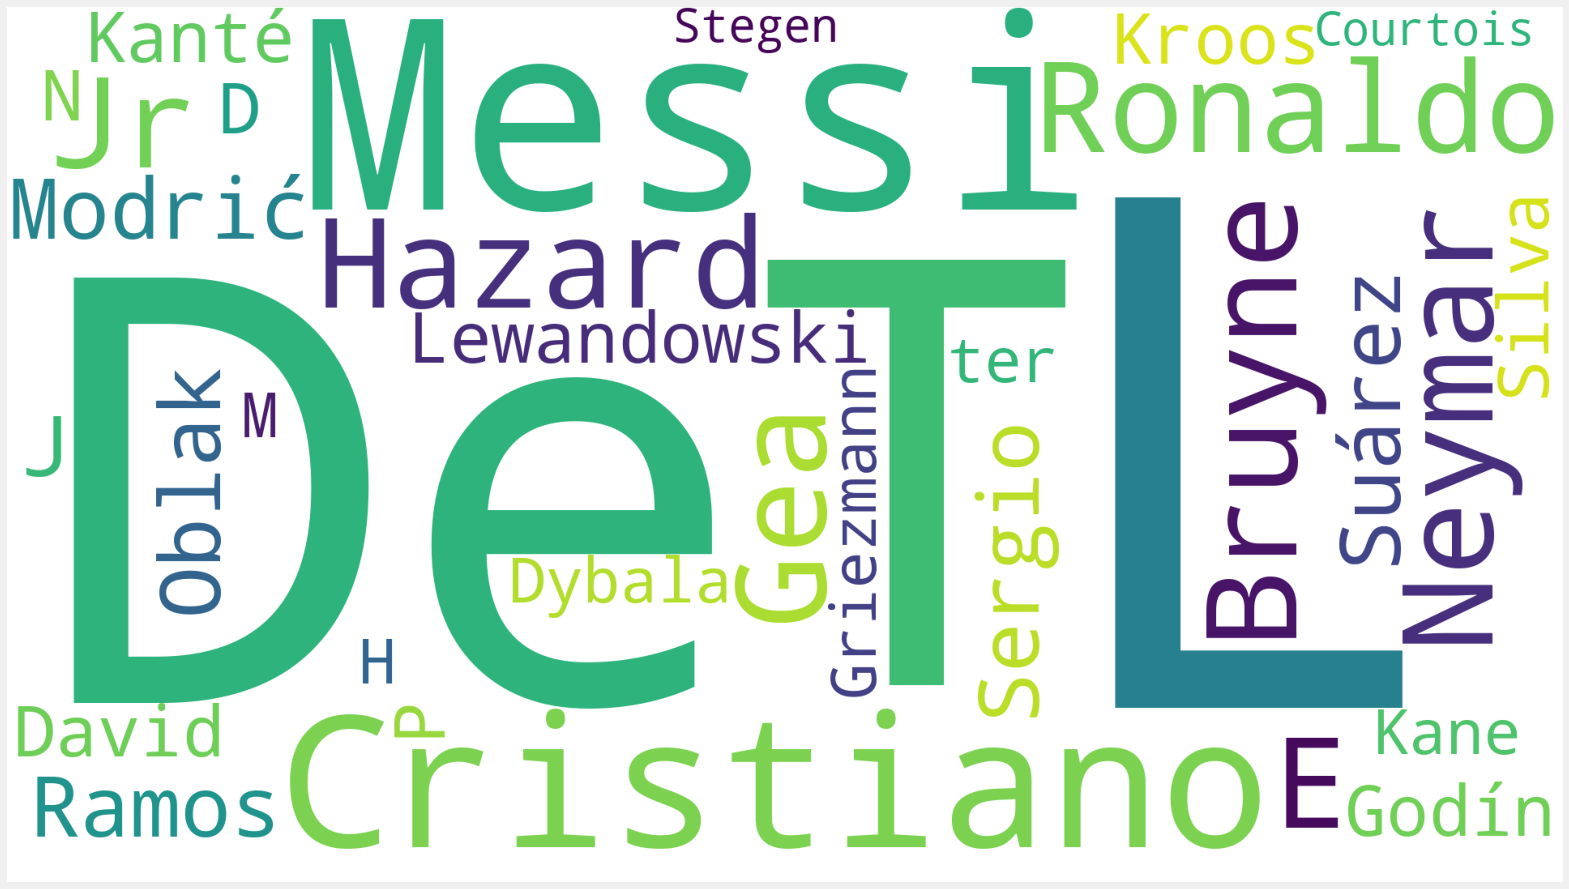

In [126]:
#showing the name of the players which occurs the most number of times from the first 20 names
#showing the name of the players which occurs the most number of times(right join)

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Name[0:20]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

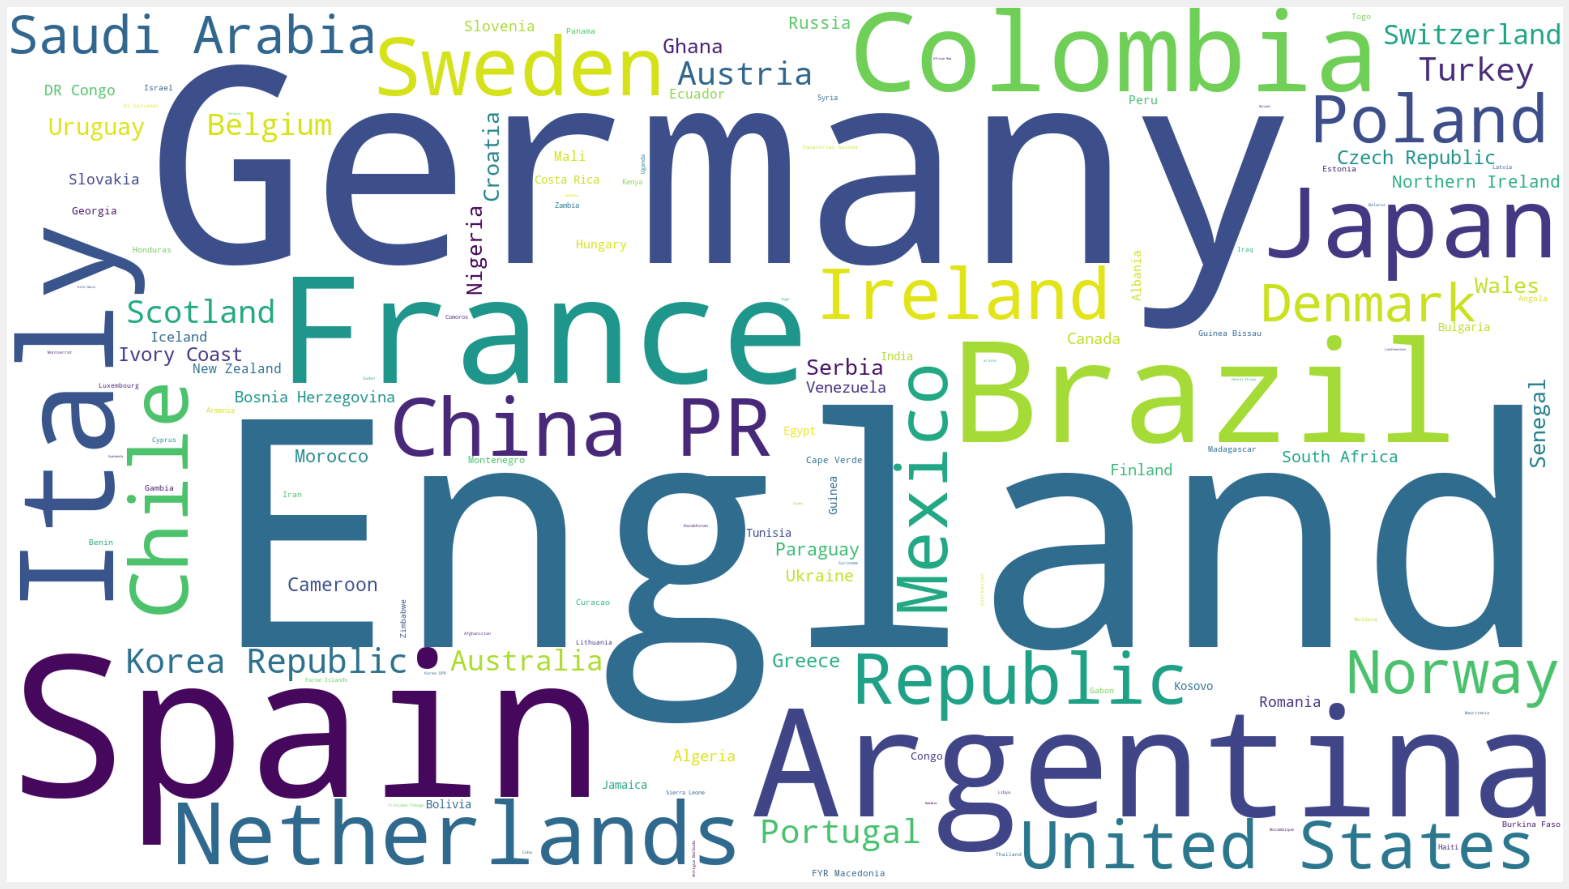

In [127]:
#Plotiing the wordcloud for the Nationalit column
#showing the name of the players which occurs the most number of times from the first 20 names
#showing the name of the players which occurs the most number of times(right join)

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [130]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Special', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'LSsplitpos', 'STsplitpos',
       'RSsplitpos', 'LWsplitpos', 'LFsplitpos', 'CFsplitpos', 'RFsplitpos',
       'RWsplitpos', 'LAMsplitpos', 'CAMsplitpos', 'RAMsplitpos', 'LMsplitpos',
       'LCMsplitpos', 'CMs

In [131]:

pro_cols=['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [133]:
df.sort_values(['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],ascending=False,inplace=True)

In [135]:
df.head(7)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,102000000.0,355000.0,8,30,2015,180.34,69.853225,2023,8,196400000.0
153,20775,Quaresma,34,https://cdn.sofifa.org/players/4/19/20775.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,84,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,1988,Right,3.0,4.0,5.0,High/ Low,Normal,Yes,RM,7.0,92.0,67.0,41.0,79.0,80.0,89.0,94.0,73.0,75.0,88.0,84.0,82.0,91.0,78.0,84.0,79.0,63.0,65.0,55.0,80.0,74.0,24.0,78.0,84.0,74.0,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,76.0,76.0,76.0,85.0,83.0,83.0,83.0,85.0,84.0,84.0,84.0,85.0,77.0,77.0,77.0,85.0,61.0,57.0,57.0,57.0,61.0,54.0,44.0,44.0,44.0,54.0,15500000.0,80000.0,7,22,2015,175.26,67.131671,2020,5,29500000.0
390,175379,Pedro León,31,https://cdn.sofifa.org/players/4/19/175379.png,Spain,https://cdn.sofifa.org/flags/45.png,81,81,SD Eibar,https://cdn.sofifa.org/teams/2/light/467.png,1980,Right,2.0,3.0,4.0,Medium/ Low,Normal,Yes,RM,21.0,91.0,76.0,36.0,83.0,68.0,84.0,87.0,85.0,85.0,85.0,63.0,63.0,68.0,76.0,73.0,84.0,39.0,65.0,63.0,80.0,55.0,43.0,79.0,82.0,71.0,71.0,50.0,46.0,36.0,11.0,12.0,10.0,15.0,16.0,75.0,75.0,75.0,81.0,80.0,80.0,80.0,81.0,82.0,82.0,82.0,81.0,79.0,79.0,79.0,81.0,66.0,66.0,66.0,66.0,66.0,61.0,53.0,53.0,53.0,61.0,15500000.0,32000.0,7,5,2016,182.88,73.028372,2020,4,32600000.0
291,185103,A. Kolarov,32,https://cdn.sofifa.org/players/4/19/185103.png,Serbia,https://cdn.sofifa.org/flags/51.png,82,82,Roma,https://cdn.sofifa.org/teams/2/light/52.png,2230,Left,2.0,3.0,3.0,High/ Medium,Normal,Yes,LB,11.0,91.0,55.0,80.0,77.0,64.0,79.0,85.0,86.0,77.0,76.0,73.0,70.0,63.0,84.0,58.0,91.0,80.0,84.0,77.0,83.0,85.0,81.0,75.0,77.0,74.0,88.0,81.0,82.0,81.0,16.0,15.0,8.0,16.0,6.0,76.0,76.0,76.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,79.0,80.0,80.0,80.0,79.0,82.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0,12500000.0,73000.0,7,22,2017,187.96,83.007404,2020,3,21300000.0
290,186345,K. Trippier,27,https://cdn.sofifa.org/players/4/19/186345.png,England,https://cdn.sofifa.org/flags/14.png,82,82,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,2161,Right,2.0,4.0,3.0,High/ High,Normal,Yes,RB,12.0,91.0,48.0,73.0,79.0,54.0,75.0,87.0,83.0,78.0,80.0,76.0,75.0,74.0,81.0,74.0,75.0,73.0,88.0,65.0,70.0,70.0,79.0,75.0,80.0,66.0,73.0,77.0,82.0,79.0,11.0,14.0,8.0,11.0,10.0,72.0,72.0,72.0,77.0,75.0,75.0,75.0,77.0,77.0,77.0,77.0,79.0,80.0,80.0,80.0,79.0,83.0,80.0,80.0,80.0,83.0,82.0,78.0,78.0,78.0,82.0,18500000.0,99000.0,6,19,2015,177.80,72.121187,2022,7,34200000.0
797,212187,P. Max,24,https://cdn.sofifa.org/players

In [136]:
data.head(7)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,90.000,90.000,90.000,94.000000,95.000000,95.000000,95.000000,94.000000,95.00000,95.00000,95.00000,93.000000,86.000000,86.000000,86.000000,93.000000,66.000000,63.000000,63.000000,63.000000,66.000000,61.000000,49.000000,49.000000,49.000000,61.000000,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94.000,94.000,94.000,92.000000,93.000000,93.000000,93.000000,92.000000,91.00000,91.00000,91.00000,91.000000,84.000000,84.000000,84.000000,91.000000,68.000000,64.000000,64.000000,64.000000,68.000000,64.000000,56.000000,56.000000,56.000000,64.000000,77000000.0,405000.0,7,10,2018,187.96,83.007404,2022,4,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,87.000,87.000,87.000,92.000000,92.000000,92.000000,92.000000,92.000000,92.00000,92.00000,92.00000,91.000000,84.000000,84.000000,84.000000,91.000000,68.000000,63.000000,63.000000,63.000000,68.000000,63.000000,50.000000,50.000000,50.000000,63.000000,118500000.0,290000.0,8,3,2017,175.26,68.038855,2022,5,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,72000000.0,260000.0,7,1,2011,193.04,76.203518,2020,9,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofif

In [151]:
## Checking which player has been mentioned the most in the 'best' list that we have prepared
i=0
while i<len(pro_cols):
    print(f'Best {pro_cols[i]} is {df.loc[df[pro_cols[i]].idxmax()][1]}')
    i+=1

Best Crossing is K. De Bruyne
Best Finishing is L. Messi
Best HeadingAccuracy is Naldo
Best ShortPassing is L. Modrić
Best Volleys is J. Rodríguez
Best Dribbling is L. Messi
Best Curve is Quaresma
Best FKAccuracy is L. Messi
Best LongPassing is T. Kroos
Best BallControl is L. Messi
Best Acceleration is Douglas Costa
Best SprintSpeed is L. Sané
Best Agility is Neymar Jr
Best Reactions is Cristiano Ronaldo
Best Balance is Bernard
Best ShotPower is Cristiano Ronaldo
Best Jumping is Cristiano Ronaldo
Best Stamina is N. Kanté
Best Strength is A. Akinfenwa
Best LongShots is L. Messi
Best Aggression is B. Pearson
Best Interceptions is N. Kanté
Best Positioning is Cristiano Ronaldo
Best Vision is K. De Bruyne
Best Penalties is M. Balotelli
Best Composure is L. Messi
Best Marking is A. Barzagli
Best StandingTackle is G. Chiellini
Best SlidingTackle is Sergio Ramos
Best GKDiving is De Gea
Best GKHandling is J. Oblak
Best GKKicking is Ederson
Best GKPositioning is G. Buffon
Best GKReflexes is De 

In [152]:
pos_cols=['LSsplitpos', 'STsplitpos','RSsplitpos', 'LWsplitpos', 'LFsplitpos', 'CFsplitpos', 'RFsplitpos',
       'RWsplitpos', 'LAMsplitpos', 'CAMsplitpos', 'RAMsplitpos', 'LMsplitpos',
       'LCMsplitpos', 'CMsplitpos', 'RCMsplitpos', 'RMsplitpos', 'LWBsplitpos',
       'LDMsplitpos', 'CDMsplitpos', 'RDMsplitpos', 'RWBsplitpos','LBsplitpos', 'LCBsplitpos', 'CBsplitpos', 'RCBsplitpos', 'RBsplitpos']

In [153]:
i=0
while i<len(pos_cols):
    print(f'Best {pos_cols[i]} is {df.loc[df[pos_cols[i]].idxmax()][1]}')
    i+=1

Best LSsplitpos is Cristiano Ronaldo
Best STsplitpos is Cristiano Ronaldo
Best RSsplitpos is Cristiano Ronaldo
Best LWsplitpos is L. Messi
Best LFsplitpos is L. Messi
Best CFsplitpos is L. Messi
Best RFsplitpos is L. Messi
Best RWsplitpos is L. Messi
Best LAMsplitpos is L. Messi
Best CAMsplitpos is L. Messi
Best RAMsplitpos is L. Messi
Best LMsplitpos is L. Messi
Best LCMsplitpos is L. Modrić
Best CMsplitpos is L. Modrić
Best RCMsplitpos is L. Modrić
Best RMsplitpos is L. Messi
Best LWBsplitpos is Marcelo
Best LDMsplitpos is N. Kanté
Best CDMsplitpos is N. Kanté
Best RDMsplitpos is N. Kanté
Best RWBsplitpos is Marcelo
Best LBsplitpos is Marcelo
Best LCBsplitpos is Sergio Ramos
Best CBsplitpos is Sergio Ramos
Best RCBsplitpos is Sergio Ramos
Best RBsplitpos is Marcelo


In [156]:
i=0
best=[]
while i<len(pro_cols):
    best.append(df.loc[df[pro_cols[i]].idxmax()][1])
    i +=1

In [157]:
best

['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'J. Rodríguez',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'L. Sané',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'K. De Bruyne',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'Ederson',
 'G. Buffon',
 'De Gea']

In [166]:
i=0
best_pos=[]
player_bp=[]
while i<len(pos_cols):
    best_pos.append(f'Best in {pos_cols[i]}  is {df.loc[df[pos_cols[i]].idxmax()][1]}')
    player_bp.append(df.loc[df[pos_cols[i]].idxmax()][1])
    i +=1

In [167]:
best_pos

['Best in LSsplitpos  is Cristiano Ronaldo',
 'Best in STsplitpos  is Cristiano Ronaldo',
 'Best in RSsplitpos  is Cristiano Ronaldo',
 'Best in LWsplitpos  is L. Messi',
 'Best in LFsplitpos  is L. Messi',
 'Best in CFsplitpos  is L. Messi',
 'Best in RFsplitpos  is L. Messi',
 'Best in RWsplitpos  is L. Messi',
 'Best in LAMsplitpos  is L. Messi',
 'Best in CAMsplitpos  is L. Messi',
 'Best in RAMsplitpos  is L. Messi',
 'Best in LMsplitpos  is L. Messi',
 'Best in LCMsplitpos  is L. Modrić',
 'Best in CMsplitpos  is L. Modrić',
 'Best in RCMsplitpos  is L. Modrić',
 'Best in RMsplitpos  is L. Messi',
 'Best in LWBsplitpos  is Marcelo',
 'Best in LDMsplitpos  is N. Kanté',
 'Best in CDMsplitpos  is N. Kanté',
 'Best in RDMsplitpos  is N. Kanté',
 'Best in RWBsplitpos  is Marcelo',
 'Best in LBsplitpos  is Marcelo',
 'Best in LCBsplitpos  is Sergio Ramos',
 'Best in CBsplitpos  is Sergio Ramos',
 'Best in RCBsplitpos  is Sergio Ramos',
 'Best in RBsplitpos  is Marcelo']

In [168]:
player_bp

['Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Messi',
 'L. Modrić',
 'L. Modrić',
 'L. Modrić',
 'L. Messi',
 'Marcelo',
 'N. Kanté',
 'N. Kanté',
 'N. Kanté',
 'Marcelo',
 'Marcelo',
 'Sergio Ramos',
 'Sergio Ramos',
 'Sergio Ramos',
 'Marcelo']

In [185]:
#player with maximum Potential and Overall Performance
print("Maximum Overall"+" "+str(df.loc[df['Overall'].idxmax()][1]))
print("Maximum Potential"+" "+str(df.loc[df['Potential'].idxmax()][1]))
# df.loc[df['Overall'].idxmax()][1]

Maximum Overall L. Messi
Maximum Potential K. Mbappé


In [170]:
df.loc[df['Potential'].idxmax()][1]

'K. Mbappé'

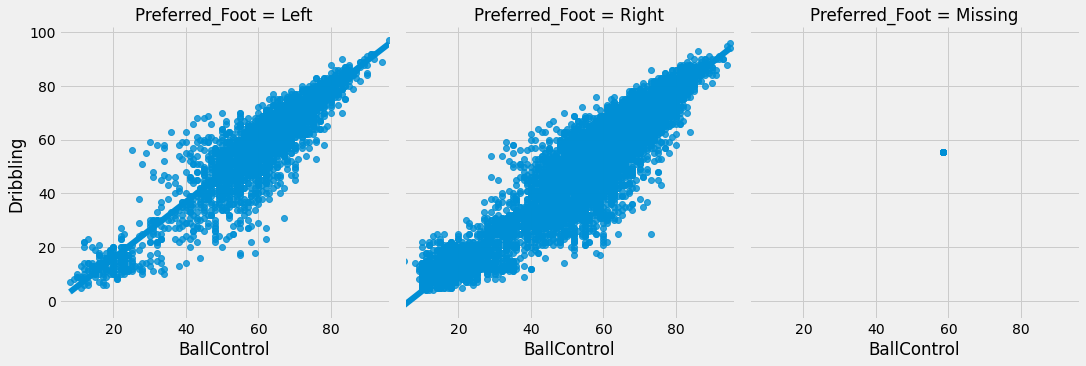

In [186]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred_Foot')
plt.show()

In [191]:
clubs_stat=df.Club.value_counts().rename_axis('unique_values').reset_index(name='counts')

In [194]:
max_clubs=clubs_stat['unique_values'][1:11]

In [198]:
max_clubs=max_clubs.to_list()

In [199]:
type(max_clubs)

list

In [200]:
data_clubs = data.loc[data['Club'].isin(max_clubs) & data['Overall']] # extracting the overall data of the clubs selected in the line above

data_clubs.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,72000000.0,260000.0,7,1,2011,193.04,76.203518,2020,9,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,85.000,85.000,85.000,90.000000,90.000000,90.000000,90.000000,90.000000,91.00000,91.00000,91.00000,91.000000,90.000000,90.000000,90.000000,91.000000,80.000000,80.000000,80.000000,80.000000,80.000000,76.000000,69.000000,69.000000,69.000000,76.000000,102000000.0,355000.0,8,30,2015,180.34,69.853225,2023,8,196400000.0
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,2246,Left,4.0,3.0,4.0,High/ High,Lean,Yes,CAM,7.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,89.000,89.000,89.000,90.000000,90.000000,90.000000,90.000000,90.000000,89.00000,89.00000,89.00000,89.000000,83.000000,83.000000,83.000000,89.000000,73.000000,70.000000,70.000000,70.000000,73.000000,70.000000,64.000000,64.000000,64.000000,70.000000,78000000.0,145000.0,7,28,2014,175.26,73.028372,2023,9,165800000.0
23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2107,Right,4.0,4.0,4.0,High/ Medium,Stocky,Yes,ST,10.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,89.000,89.000,89.000,89.000000,90.000000,90.000000,90.000000,89.000000,88.00000,88.00000,88.00000,86.000000,79.000000,79.000000,79.000000,86.000000,61.000000,59.000000,59.000000,59.000000,61.000000,56.000000,50.000000,50.000000,50.000000,56.000000,64500000.0,300000.0,7,28,2011,172.72,69.853225,2021,10,119300000.0
45,195864,P. Pogba,25,https://cdn.sofifa.org/players/4/19/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,91,Manchester United,https://cdn.sof

In [202]:
data_clubs.shape

(166, 90)

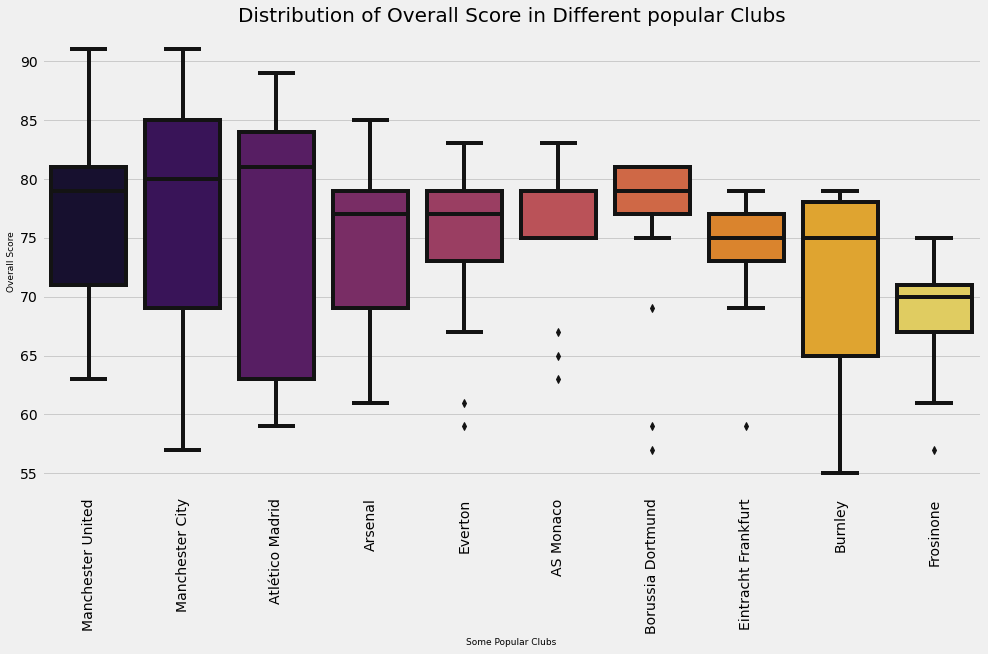

In [203]:
#Distribution of overall score in Different popular clubs  with maximum players
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno') # creating a boxplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [205]:
data_clubs = data.loc[data['Club'].isin(max_clubs) & data['MonthlyWage']] # extracting the overall data of the clubs selected in the line above

data_clubs.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,72000000.0,260000.0,7,1,2011,193.04,76.203518,2020,9,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,85.000,85.000,85.000,90.000000,90.000000,90.000000,90.000000,90.000000,91.00000,91.00000,91.00000,91.000000,90.000000,90.000000,90.000000,91.000000,80.000000,80.000000,80.000000,80.000000,80.000000,76.000000,69.000000,69.000000,69.000000,76.000000,102000000.0,355000.0,8,30,2015,180.34,69.853225,2023,8,196400000.0
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,68000000.0,94000.0,7,16,2014,187.96,87.089735,2021,7,144500000.0
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,1946,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,CB,10.0,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,67.000,67.000,67.000,64.000000,65.000000,65.000000,65.000000,64.000000,65.00000,65.00000,65.00000,66.000000,71.000000,71.000000,71.000000,66.000000,79.000000,84.000000,84.000000,84.000000,79.000000,82.000000,90.000000,90.000000,90.000000,82.000000,44000000.0,125000.0,8,4,2010,187.96,78.017888,2019,9,90200000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.or

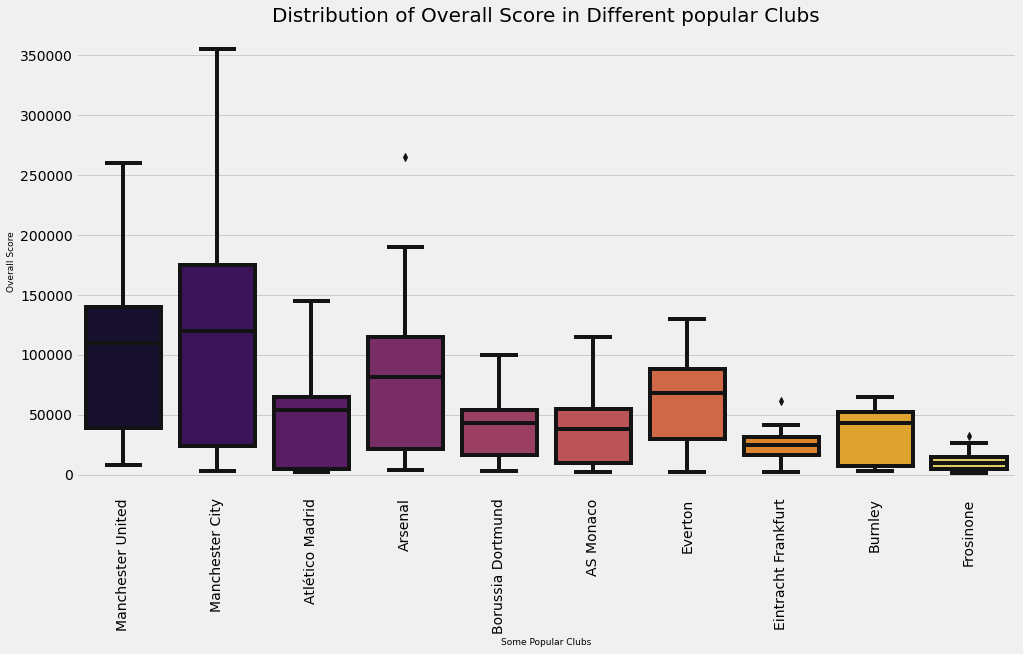

In [207]:
#Distribution of overall score in Different popular clubs  with maximum players
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['MonthlyWage'], palette = 'inferno') # creating a boxplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [209]:
#the longest membership in the club
club_mem=data.copy()
club_mem.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,110500000.0,565000.0,7,1,2004,170.18,72.121187,2021,17,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,77000000.0,405000.0,7,10,2018,187.96,83.007404,2022,4,127100000.0


In [210]:
 club_mem.drop(club_mem.loc[club_mem['Joined_year']==0].index, inplace=True)

In [211]:
club_mem.sort_values('total_year_club',ascending=False,inplace=True)

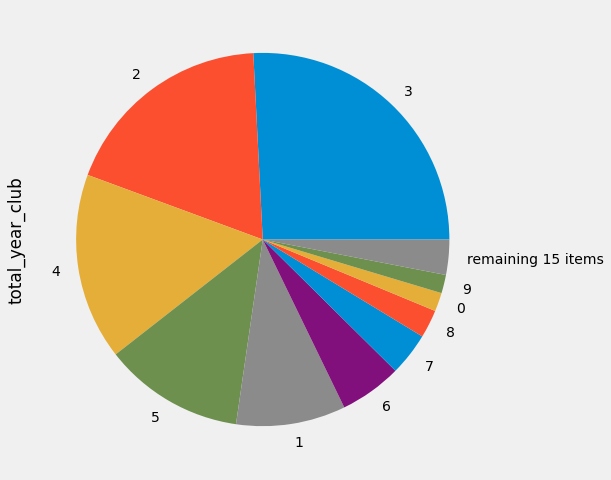

In [214]:
temp = club_mem.total_year_club.value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
    temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
    temp2.plot(kind='pie')
# temp

In [215]:
#finding 15 youngest players from the dataset
#finding 15 oldest players from the dataset
club_mem.sort_values('Age',ascending=False,inplace=True)

In [216]:
club_mem.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause
4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,https://cdn.sofifa.org/teams/2/light/110147.png,1256,Right,2.0,3.0,1.0,Medium/ Medium,Stocky,No,GK,21.0,19.0,14.0,24.0,26.0,13.0,12.0,12.0,20.0,27.0,23.0,60.0,57.0,69.0,72.0,69.0,24.0,85.0,41.0,66.0,18.0,26.0,12.0,12.0,40.0,23.0,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,160000.0,8000.0,6,1,1991,172.72,74.842741,2021,30,2900000.0
17726,51963,T. Warner,44,https://cdn.sofifa.org/players/4/19/51963.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,53,53,Accrington Stanley,https://cdn.sofifa.org/teams/2/light/110313.png,926,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,34.0,19.0,13.0,15.0,24.0,15.0,14.0,14.0,12.0,24.0,27.0,23.0,21.0,27.0,47.0,38.0,36.0,43.0,25.0,58.0,20.0,31.0,15.0,15.0,21.0,17.0,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,700000.0,1000.0,8,3,2018,193.04,83.914588,2019,1,2900000.0
18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,774,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,44.0,11.0,12.0,12.0,18.0,11.0,11.0,12.0,13.0,13.0,16.0,15.0,17.0,31.0,48.0,31.0,23.0,45.0,22.0,44.0,12.0,24.0,15.0,10.0,11.0,22.0,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,700000.0,1000.0,8,17,2018,187.96,86.182550,2023,5,2900000.0
10545,140183,S. Narazaki,42,https://cdn.sofifa.org/players/4/19/140183.png,Japan,https://cdn.sofifa.org/flags/163.png,65,65,Nagoya Grampus,https://cdn.sofifa.org/teams/2/light/112092.png,1296,Right,2.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,23.0,11.0,23.0,29.0,19.0,30.0,22.0,40.0,28.0,30.0,52.0,56.0,55.0,65.0,62.0,40.0,65.0,40.0,65.0,18.0,30.0,14.0,12.0,64.0,11.0,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,59.836,59.836,59.836,61.058181,60.739921,60.739921,60.739921,61.058181,61.00366,61.00366,61.00366,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,40000.0,1000.0,1,1,1999,187.96,79.832257,2021,22,2900000.0
7225,142998,C. Muñoz,41,https://cdn.sofifa.org/players/4/19/142998.png,Argentina,https://cdn.sofifa.org/flags/52.png,68,68,CD Universidad d

In [218]:
club_mem.Name[0:14].to_list()#15 oldest players

['O. Pérez',
 'T. Warner',
 'K. Pilkington',
 'S. Narazaki',
 'C. Muñoz',
 'M. Tyler',
 'B. Nivet',
 'H. Sulaimani',
 'W. Díaz',
 'S. Bertoli',
 'B. Castillo',
 'C. Lucchetti',
 'Hilton',
 'F. Kippe']

In [219]:
young_palyers=club_mem.tail(15)

In [222]:
young_palyers.Name.to_list()#15 young players

['J. Rowland',
 'B. Mumba',
 'H. Andersson',
 'R. Gómez',
 'A. Taoui',
 "L. D'Arrigo",
 'A. Mahlonoko',
 'B. Worman',
 'J. Olstad',
 'B. Waine',
 'Guerrero',
 'J. Kitolano',
 'J. Imbrechts',
 'Pelayo Morilla',
 'H. Massengo']

In [223]:
club_mem.Nationality.unique()

array(['Mexico', 'Trinidad & Tobago', 'England', 'Japan', 'Argentina',
       'France', 'Saudi Arabia', 'Colombia', 'Brazil', 'Norway', 'Italy',
       'Netherlands', 'Greece', 'Germany', 'Korea Republic',
       'United States', 'Spain', 'Belgium', 'Peru', 'China PR', 'Croatia',
       'Hong Kong', 'Czech Republic', 'Slovakia', 'Republic of Ireland',
       'Northern Ireland', 'Poland', 'Turkey', 'Scotland', 'Canada',
       'Chile', 'Latvia', 'Austria', 'Wales', 'Sweden', 'Uruguay',
       'Australia', 'Portugal', 'Denmark', 'Oman', 'Montenegro',
       'New Zealand', 'Morocco', 'Switzerland', 'Korea DPR', 'Finland',
       'Jamaica', 'Honduras', 'Gabon', 'Bulgaria', 'Algeria', 'Guyana',
       'Tunisia', 'Senegal', 'Ukraine', 'Slovenia', 'Syria', 'Madagascar',
       'Nigeria', 'Ivory Coast', 'Zimbabwe', 'Romania', 'Togo', 'Russia',
       'Iceland', 'Panama', 'Angola', 'Serbia', 'FYR Macedonia',
       'Venezuela', 'Albania', 'Puerto Rico', 'Mali', 'South Africa',
       'Cape Verd

In [243]:
import requests
import random
from math import pi
import io
from PIL import Image
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

# defining a method to show the details of a player
def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
     
    # obtaining the player image, flag image and logo image
    img_flag = requests.get(image).content
#     with open(flag_image, 'wb') as handler:
#         handler.write(img_flag)
    with open(flag_image, "rb") as f:
        b = io.BytesIO(f.read())
        im = Image.open(b)
        im.save('flag.png')
    
    player_img = requests.get(photo).content
#     with open(player_image, 'wb') as handler:
#         handler.write(player_img)
    with open(player_image, "rb") as f:
            b = io.BytesIO(f.read())
            im = Image.open(b)
            im.save('player.png')
     
    logo_img = requests.get(logo).content
#     with open(logo_image, 'wb') as handler:
#         handler.write(logo_img)
    with open(logo_image, "rb") as f:
                b = io.BytesIO(f.read())
                im = Image.open(b)
                im.save('logo.png')
     
    # Defining the colour schemes
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7' # if random colour  is white, assign a different colour
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    # adjusting the angles to show different aspects in the graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar') # sepcifying a  polar graph type
    ax.set_theta_offset(pi / 2) # set the offset in radians
    ax.set_theta_direction(-1) #the angle increases in the clockwise direction
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    #creating the list of values which are not in (image, age, nationality, photo, logo, club) to show in the graph
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    # customizing the graph attributes
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    # placeholders for showing nationality, age and team name
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    # specifying the location for showing the image of player
    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    # specifying the location for showing the logo
    arr_img_logo = plt.imread(logo_image, format='jpg')
    
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-350, -246),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [225]:
club_mem.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Special', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'LSsplitpos', 'STsplitpos',
       'RSsplitpos', 'LWsplitpos', 'LFsplitpos', 'CFsplitpos', 'RFsplitpos',
       'RWsplitpos', 'LAMsplitpos', 'CAMsplitpos', 'RAMsplitpos', 'LMsplitpos',
       'LCMsplitpos', 'CMs

In [244]:
# defining a method to show the leading performers
def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

In [235]:
# functions to get the rounded values from different columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [229]:
# adding these categories to the data

df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [230]:
# dataset after transformation
df.head(20)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,LSsplitpos,STsplitpos,RSsplitpos,LWsplitpos,LFsplitpos,CFsplitpos,RFsplitpos,RWsplitpos,LAMsplitpos,CAMsplitpos,RAMsplitpos,LMsplitpos,LCMsplitpos,CMsplitpos,RCMsplitpos,RMsplitpos,LWBsplitpos,LDMsplitpos,CDMsplitpos,RDMsplitpos,RWBsplitpos,LBsplitpos,LCBsplitpos,CBsplitpos,RCBsplitpos,RBsplitpos,MarketValue,MonthlyWage,Joined_mon,Joined_day,Joined_year,HeightCM,WeightKg,Contract_Valid_Until_year,total_year_club,ReleaseClause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,102000000.0,355000.0,8,30,2015,180.34,69.853225,2023,8,196400000.0,59,79,81,92,81,76,92,85
153,20775,Quaresma,34,https://cdn.sofifa.org/players/4/19/20775.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,84,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,1988,Right,3.0,4.0,5.0,High/ Low,Normal,Yes,RM,7.0,92.0,67.0,41.0,79.0,80.0,89.0,94.0,73.0,75.0,88.0,84.0,82.0,91.0,78.0,84.0,79.0,63.0,65.0,55.0,80.0,74.0,24.0,78.0,84.0,74.0,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,76.0,76.0,76.0,85.0,83.0,83.0,83.0,85.0,84.0,84.0,84.0,85.0,77.0,77.0,77.0,85.0,61.0,57.0,57.0,57.0,61.0,54.0,44.0,44.0,44.0,54.0,15500000.0,80000.0,7,22,2015,175.26,67.131671,2020,5,29500000.0,20,78,68,82,84,67,84,76
390,175379,Pedro León,31,https://cdn.sofifa.org/players/4/19/175379.png,Spain,https://cdn.sofifa.org/flags/45.png,81,81,SD Eibar,https://cdn.sofifa.org/teams/2/light/467.png,1980,Right,2.0,3.0,4.0,Medium/ Low,Normal,Yes,RM,21.0,91.0,76.0,36.0,83.0,68.0,84.0,87.0,85.0,85.0,85.0,63.0,63.0,68.0,76.0,73.0,84.0,39.0,65.0,63.0,80.0,55.0,43.0,79.0,82.0,71.0,71.0,50.0,46.0,36.0,11.0,12.0,10.0,15.0,16.0,75.0,75.0,75.0,81.0,80.0,80.0,80.0,81.0,82.0,82.0,82.0,81.0,79.0,79.0,79.0,81.0,66.0,66.0,66.0,66.0,66.0,61.0,53.0,53.0,53.0,61.0,15500000.0,32000.0,7,5,2016,182.88,73.028372,2020,4,32600000.0,44,73,66,86,68,60,81,77
291,185103,A. Kolarov,32,https://cdn.sofifa.org/players/4/19/185103.png,Serbia,https://cdn.sofifa.org/flags/51.png,82,82,Roma,https://cdn.sofifa.org/teams/2/light/52.png,2230,Left,2.0,3.0,3.0,High/ Medium,Normal,Yes,LB,11.0,91.0,55.0,80.0,77.0,64.0,79.0,85.0,86.0,77.0,76.0,73.0,70.0,63.0,84.0,58.0,91.0,80.0,84.0,77.0,83.0,85.0,81.0,75.0,77.0,74.0,88.0,81.0,82.0,81.0,16.0,15.0,8.0,16.0,6.0,76.0,76.0,76.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,79.0,80.0,80.0,80.0,79.0,82.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0,12500000.0,73000.0,7,22,2017,187.96,83.007404,2020,3,21300000.0,81,80,81,82,72,75,82,76
290,186345,K. Trippier,27,https://cdn.sofifa.org/players/4/19/186345.png,England,https://cdn.sofifa.org/flags/14.png,82,82,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,2161,Right,2.0,4.0,3.0,High/ High,Normal,Yes,RB,12.0,91.0,48.0,73.0,79.0,54.0,75.0,87.0,83.0,78.0,80.0,76.0,75.0,74.0,81.0,74.0,75.0,73.0,88.0,65.0,70.0,70.0,79.0,75.0,80.0,66.0,73.0,77.0,82.0,79.0,11.0,14.0,8.0,11.0,10.0,72.0,72.0,72.0,77.0,75.0,75.0,75.0,77.0,77.0,77.0,77.0,79.0,80.0,80.0,80.0,79.0,83.0,

In [232]:
# creating the players dataset
players = df[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club Logo', 'Club']]

players.head(20)

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club Logo,Club
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City
153,Quaresma,20,78,68,82,84,67,84,76,https://cdn.sofifa.org/flags/38.png,34,Portugal,https://cdn.sofifa.org/players/4/19/20775.png,https://cdn.sofifa.org/teams/2/light/327.png,Beşiktaş JK
390,Pedro León,44,73,66,86,68,60,81,77,https://cdn.sofifa.org/flags/45.png,31,Spain,https://cdn.sofifa.org/players/4/19/175379.png,https://cdn.sofifa.org/teams/2/light/467.png,SD Eibar
291,A. Kolarov,81,80,81,82,72,75,82,76,https://cdn.sofifa.org/flags/51.png,32,Serbia,https://cdn.sofifa.org/players/4/19/185103.png,https://cdn.sofifa.org/teams/2/light/52.png,Roma
290,K. Trippier,79,79,75,83,76,75,82,66,https://cdn.sofifa.org/flags/14.png,27,England,https://cdn.sofifa.org/players/4/19/186345.png,https://cdn.sofifa.org/teams/2/light/18.png,Tottenham Hotspur
797,P. Max,73,72,69,80,80,73,80,53,https://cdn.sofifa.org/flags/21.png,24,Germany,https://cdn.sofifa.org/players/4/19/212187.png,https://cdn.sofifa.org/teams/2/light/100409.png,FC Augsburg
28,J. Rodríguez,46,82,75,87,77,67,88,86,https://cdn.sofifa.org/flags/56.png,26,Colombia,https://cdn.sofifa.org/players/4/19/198710.png,https://cdn.sofifa.org/teams/2/light/21.png,FC Bayern München
35,Marcelo,81,86,84,83,85,83,88,67,https://cdn.sofifa.org/flags/54.png,30,Brazil,https://cdn.sofifa.org/players/4/19/176676.png,https://cdn.sofifa.org/teams/2/light/243.png,Real Madrid
82,J. Kimmich,78,80,79,85,79,78,86,63,https://cdn.sofifa.org/flags/21.png,23,Germany,https://cdn.sofifa.org/players/4/19/212622.png,https://cdn.sofifa.org/teams/2/light/21.png,FC Bayern München
112,Alex Telles,80,81,78,86,81,78,86,72,https://cdn.sofifa.org/flags/54.png,25,Brazil,https://cdn.sofifa.org/players/4/19/212462.png,https://cdn.sofifa.org/teams/2/light/236.png,FC Porto


In [245]:
graphPolar(0)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000027BAEA13BE8>

In [ ]:
#https://github.com/sharmaroshan/FIFA-2019-Analysis/blob/master/fifa-2019-data-analysis-and-visualization.ipynb